금융인공지능 중간고사

경영학부 20170716 안윤수

***************************
라이브러리 설치 및 Dataset 가져오기

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 3.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=ebc87becb3b2cae94d0537b447c3bd664fba1be980fd2fc847cded971ea3e7c5
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
start = datetime(2018,1,1)
end = datetime(2021,9,30)

hyundai = yf.download('005380.KS',start,end)
naver = yf.download('035420.KS',start,end)
sk = yf.download('000660.KS',start,end)
kospi = yf.download('^KS11',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(hyundai.tail())
print(naver.tail())
print(sk.tail())
print(kospi.tail())

                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2021-09-24  209500.0  210500.0  206000.0  207000.0   207000.0  413926
2021-09-27  205000.0  206000.0  203500.0  204000.0   204000.0  584898
2021-09-28  204000.0  204000.0  200500.0  201500.0   201500.0  719631
2021-09-29  197500.0  202000.0  197500.0  201500.0   201500.0  934463
2021-09-30  200000.0  201000.0  199000.0  200000.0   200000.0  594666
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2021-09-24  398500.0  406000.0  398000.0  405500.0   405500.0  574341
2021-09-27  406000.0  407500.0  401000.0  403000.0   403000.0  455667
2021-09-28  399500.0  400000.0  391000.0  392500.0   392500.0  857556
2021-09-29  380500.0  390000.0  380000.0  387000.0   387000.0  664216
2021-09-30  383000.0  390000.0  381000.0  388000.0   388000.0  611128
                Open

In [ ]:
stocks = pd.DataFrame({
    'HYUNDAI' : hyundai['Adj Close'],
    'NAVER' : naver['Adj Close'],
    'SK_HYNIX' : sk['Adj Close'],
    'KOSPI' : kospi['Adj Close']
}).dropna()
print(stocks.tail())

             HYUNDAI     NAVER  SK_HYNIX        KOSPI
Date                                                 
2021-09-24  207000.0  405500.0  104000.0  3125.239990
2021-09-27  204000.0  403000.0  104500.0  3133.639893
2021-09-28  201500.0  392500.0  103500.0  3097.919922
2021-09-29  201500.0  387000.0  100000.0  3060.270020
2021-09-30  200000.0  388000.0  103000.0  3068.820068


In [ ]:
#연속시간 수익률
rtn = (np.log(stocks) - np.log(stocks.shift(1)))*100
rtn.columns = ['r_hyundai','r_naver','r_sk','r_kospi']
print(rtn.tail())

            r_hyundai   r_naver      r_sk   r_kospi
Date                                               
2021-09-24  -0.722025  1.365633 -1.432005 -0.074849
2021-09-27  -1.459880 -0.618431  0.479617  0.268416
2021-09-28  -1.233061 -2.640002 -0.961546 -1.146434
2021-09-29   0.000000 -1.411184 -3.440143 -1.222774
2021-09-30  -0.747201  0.258065  2.955880  0.278999


***********************
1. 각 주식 및 KOSPI 지수의 기초통계를 구하시오. 그리고 기초통계를 이용하여 각 주식의 특성을 분석하시오.

In [ ]:
#주가 기초통계
df = stocks
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

            HYUNDAI         NAVER      SK_HYNIX          KOSPI
count  9.200000e+02  9.200000e+02  9.200000e+02     920.000000
mean   1.465138e+05  2.190782e+05  8.825775e+04    2405.515533
std    4.649624e+04  1.018851e+05  2.129862e+04     421.894633
min    6.458761e+04  1.058461e+05  5.596204e+04    1457.640015
25%    1.157881e+05  1.399889e+05  7.423075e+04    2100.470032
50%    1.272097e+05  1.705770e+05  8.109668e+04    2270.130005
75%    1.754352e+05  2.966999e+05  9.779917e+04    2515.392395
max    2.663900e+05  4.540000e+05  1.485000e+05    3305.209961
var    2.161900e+09  1.038058e+10  4.536311e+08  177995.080999
skew   9.059806e-01  8.203273e-01  1.077134e+00       0.855936
kurt  -4.468292e-01 -7.500973e-01  7.594118e-02      -0.411722


In [ ]:
#주가수익률 기초통계
df = rtn
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

        r_hyundai     r_naver        r_sk     r_kospi
count  919.000000  919.000000  919.000000  919.000000
mean     0.040212    0.087809    0.035684    0.022903
std      2.317848    2.141794    2.349532    1.211254
min    -13.696589   -8.201315   -9.518574   -8.766972
25%     -1.134241   -1.181009   -1.426437   -0.567284
50%      0.000000    0.000000    0.000000    0.088171
75%      1.090461    1.209700    1.434635    0.646098
max     17.745532    9.358254   12.575635    8.251268
var      5.372421    4.587281    5.520302    1.467137
skew     0.885035    0.431947    0.289393   -0.237918
kurt     8.791235    1.875873    1.704859    8.495176


주가의 통계량을 분석하기에는 수익률의 통계량을 분석하는 것이 적절하므로, 연속시간 수익률의 기초통계량을 기준으로 특성을 분석해 보겠다.

먼저 평균을 살펴보면, 코스피 지수의 평균수익률(0.02%)에 비하여 개별주식들은 모두 더 높은 수익을 거둔 것으로 볼 수 있다.

반면에 표준편차를 살펴 본다면, 세 개별 주식 모두 코스피 지수의 표준편차(1.21%)에 비하여 더 높은 표준편차를 보이는데, 더 높은 기대수익(평균)을 가질수록 더 높은 위험(표준편차)를 가져가야 한다는 재무학의 기본 전제가 여기서도 어느정도 성립됨을 알 수 있다.

왜도를 보면, 코스피 지수의 경우 일반적인 주식의 통계량과 같이 음(-)의 왜도를 보이는 반면, 나머지 개별 주식들은 양(+)의 왜도를 보이는 것으로 볼 때, 큰 손실을 볼 수 있는 경우가 개별 주식들은 지수보다 더 적음을 알 수 있다.

첨도의 경우 현대차와 코스피지수는 8의 높은 첨도를 보이는 반면, 네이버와 하이닉스는 정규분포보다 낮은 첨도를 보여주고 있다. 코스피지수와 현대차는 다른 두 주식들에 비해 fat tail로 인한 tail risk가 더 큼을 볼 수 있다.

만약 이러한 기초통계량만을 보고 최적의 주식을 고르자면, 위험대비 수익률(sharpe ratio)가 가장 크고, 양의 왜도를 보이며, 첨도가 낮아 tail risk가 작은 네이버를 투자하는게 가장 바람직할 것이다.



***************************************
2. correlation coefficient, 히스토그램과 pairplot을 그리고 특성을 설명하시오.

           HYUNDAI     NAVER  SK_HYNIX     KOSPI
HYUNDAI   1.000000  0.847015  0.844938  0.945680
NAVER     0.847015  1.000000  0.817881  0.835970
SK_HYNIX  0.844938  0.817881  1.000000  0.840546
KOSPI     0.945680  0.835970  0.840546  1.000000
           r_hyundai   r_naver      r_sk   r_kospi
r_hyundai   1.000000  0.249267  0.298921  0.593460
r_naver     0.249267  1.000000  0.275914  0.450790
r_sk        0.298921  0.275914  1.000000  0.639582
r_kospi     0.593460  0.450790  0.639582  1.000000


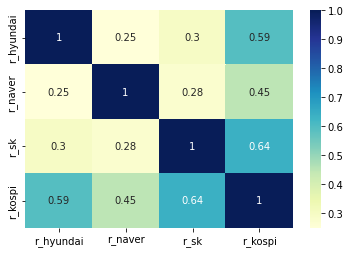

In [ ]:
#correlation coefficient
print(stocks.corr())
print(rtn.corr())
sns.heatmap(rtn.corr(), annot=True, cmap="YlGnBu")
plt.show()

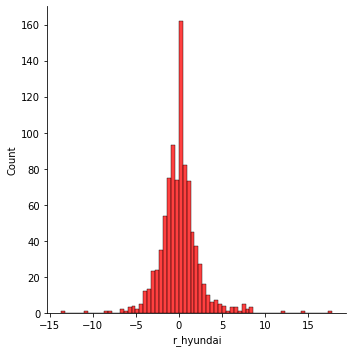

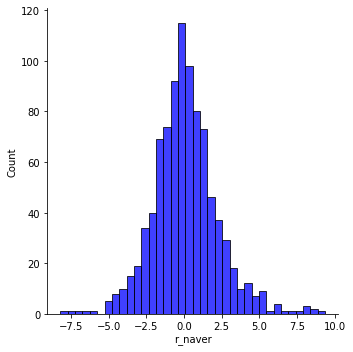

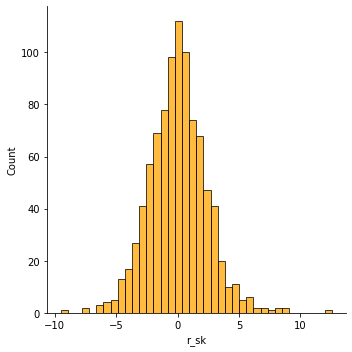

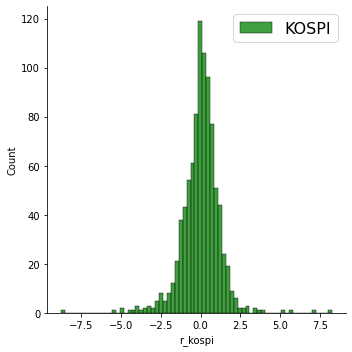

In [ ]:
#histogram
plt.rcParams['legend.fontsize'] = 16

sns.displot(rtn['r_hyundai'], label='HYUNDAI', color='red')
sns.displot(rtn['r_naver'], label='NAVER', color='blue')
sns.displot(rtn['r_sk'], label='SK_HYNIX', color='orange')
sns.displot(rtn['r_kospi'], label='KOSPI', color='g')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Relative Freqeuncy')

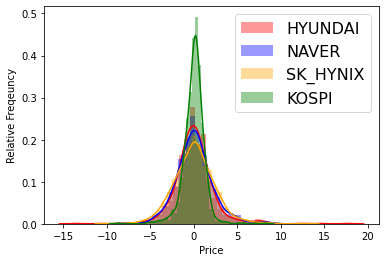

In [ ]:
#주가수익률의 histogram
plt.rcParams['legend.fontsize'] = 16

sns.distplot(rtn['r_hyundai'], label='HYUNDAI', color='red')
sns.distplot(rtn['r_naver'], label='NAVER', color='blue')
sns.distplot(rtn['r_sk'], label='SK_HYNIX', color='orange')
sns.distplot(rtn['r_kospi'], label='KOSPI', color='g')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Relative Freqeuncy')  

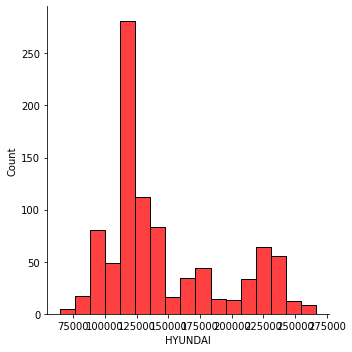

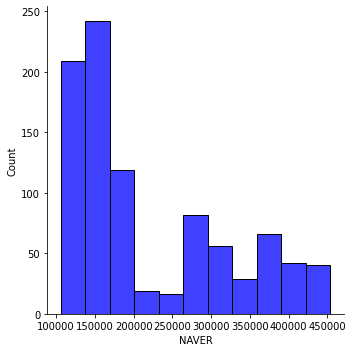

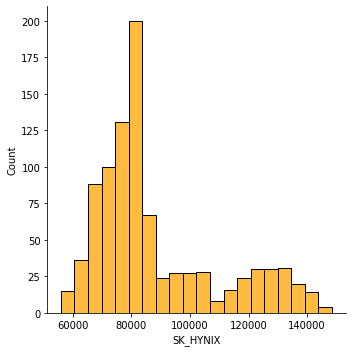

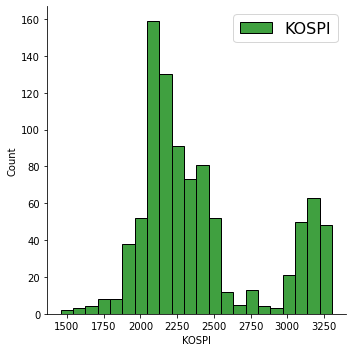

In [ ]:
#주가의 histogram
plt.rcParams['legend.fontsize'] = 16

sns.displot(stocks['HYUNDAI'], label='HYUNDAI', color='red')
sns.displot(stocks['NAVER'], label='NAVER', color='blue')
sns.displot(stocks['SK_HYNIX'], label='SK_HYNIX', color='orange')
sns.displot(stocks['KOSPI'], label='KOSPI', color='g')
plt.legend() 

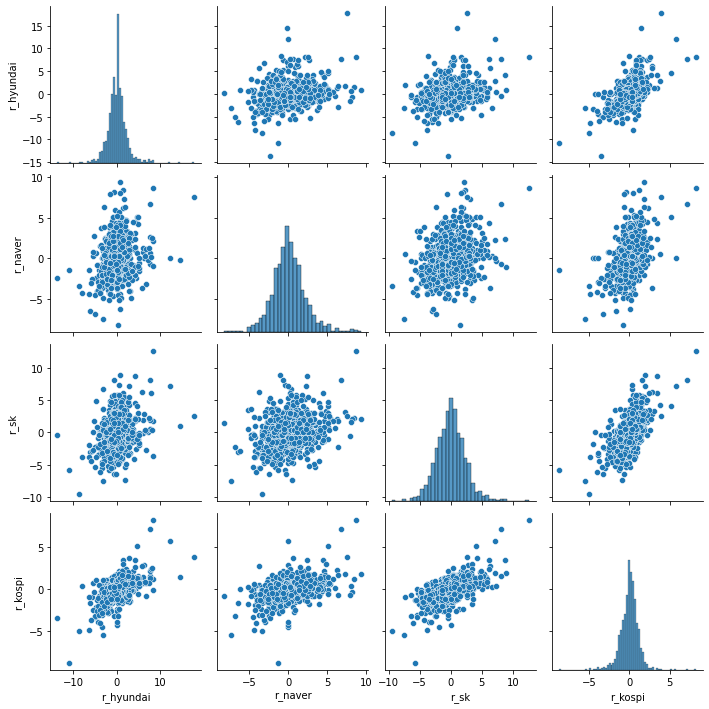

In [ ]:
#pairplot
sns.pairplot(rtn)

4개 자산의 수익률의 correlation matrix와 pairplot을 보면 코스피와 sk 하이닉스의 상관계수가 0.64로 가장 높은 것을 볼 수 있는데, 코스피의 시가총액에서 sk 하이닉스가 영위하는 반도체 산업의 비중이 크고, sk 하이닉스 자체도 대한민국 증시에서 지분이 큰 만큼 가장 높은 상관관계를 가짐을 알 수 있다. 반면 네이버의 경우 가장 상관계수가 낮은데, 경기민감주가 많은 비중을 차지하는 코스피와 다르게 네이버는 꾸준하게 수익을 늘려가는 성장주이기 때문이다.

4개 자산의 수익률의 히스토그램을 살펴보면, 현대차와 코스피의 수익률이 앞서 기초통계에서 본 것과 같이 평균에 가깝게 몰려있어 첨도가 큰 것을 알 수 있었으며, 코스피 지수의 경우 확연히 다른 개별주식들에 비하여 분산이 작은 것을 시각적으로 확인 할 수 있었다.

마지막으로 주가의 히스토그램을 보면, 네 자산 모두 양의 수익률을 보이며, 전체적으로 가격이 많이 올라갔음을 확인할 수 있었다.

****************************
Moving Average 설정

In [ ]:
short_window = 20
long_window = 40
#현대차
signals_hyundai = pd.DataFrame(index=stocks.index)
signals_hyundai['signal'] = 0.0
signals_hyundai['short_ma'] = stocks['HYUNDAI'].rolling(window=short_window,min_periods=1, center=False).mean()
signals_hyundai['long_ma'] = stocks['HYUNDAI'].rolling(window=long_window,min_periods=1, center=False).mean()
signals_hyundai['signal'][short_window:] = np.where(signals_hyundai['short_ma'][short_window:] 
                                            > signals_hyundai['long_ma'][short_window:], 1.0, 0.0)
signals_hyundai['positions'] = signals_hyundai['signal'].diff()

print(signals_hyundai.head())
#naver
signals_naver = pd.DataFrame(index=stocks.index)
signals_naver['signal'] = 0.0
signals_naver['short_ma'] = stocks['NAVER'].rolling(window=short_window,min_periods=1, center=False).mean()
signals_naver['long_ma'] = stocks['NAVER'].rolling(window=long_window,min_periods=1, center=False).mean()
signals_naver['signal'][short_window:] = np.where(signals_naver['short_ma'][short_window:] 
                                            > signals_naver['long_ma'][short_window:], 1.0, 0.0)
signals_naver['positions'] = signals_naver['signal'].diff()

print(signals_naver.head())
#SK하이닉스
signals_sk = pd.DataFrame(index=stocks.index)
signals_sk['signal'] = 0.0
signals_sk['short_ma'] = stocks['SK_HYNIX'].rolling(window=short_window,min_periods=1, center=False).mean()
signals_sk['long_ma'] = stocks['SK_HYNIX'].rolling(window=long_window,min_periods=1, center=False).mean()
signals_sk['signal'][short_window:] = np.where(signals_sk['short_ma'][short_window:] 
                                            > signals_sk['long_ma'][short_window:], 1.0, 0.0)
signals_sk['positions'] = signals_sk['signal'].diff()

print(signals_sk.head())
#KOSPI
signals_kospi = pd.DataFrame(index=stocks.index)
signals_kospi['signal'] = 0.0
signals_kospi['short_ma'] = stocks['KOSPI'].rolling(window=short_window,min_periods=1, center=False).mean()
signals_kospi['long_ma'] = stocks['KOSPI'].rolling(window=long_window,min_periods=1, center=False).mean()
signals_kospi['signal'][short_window:] = np.where(signals_kospi['short_ma'][short_window:] 
                                            > signals_kospi['long_ma'][short_window:], 1.0, 0.0)
signals_kospi['positions'] = signals_kospi['signal'].diff()

print(signals_kospi.head())

            signal       short_ma        long_ma  positions
Date                                                       
2018-01-03     0.0  138209.203125  138209.203125        NaN
2018-01-04     0.0  136372.539062  136372.539062        0.0
2018-01-05     0.0  136525.593750  136525.593750        0.0
2018-01-08     0.0  137061.289062  137061.289062        0.0
2018-01-09     0.0  137658.206250  137658.206250        0.0
            signal       short_ma        long_ma  positions
Date                                                       
2018-01-03     0.0  173130.375000  173130.375000        NaN
2018-01-04     0.0  175316.867188  175316.867188        0.0
2018-01-05     0.0  177039.567708  177039.567708        0.0
2018-01-08     0.0  179988.015625  179988.015625        0.0
2018-01-09     0.0  181518.562500  181518.562500        0.0
            signal      short_ma       long_ma  positions
Date                                                     
2018-01-03     0.0  74202.210938  74202.2109

*******************************************
3. 각 자산에 대해서 buy, sell 시점을 구하시오.

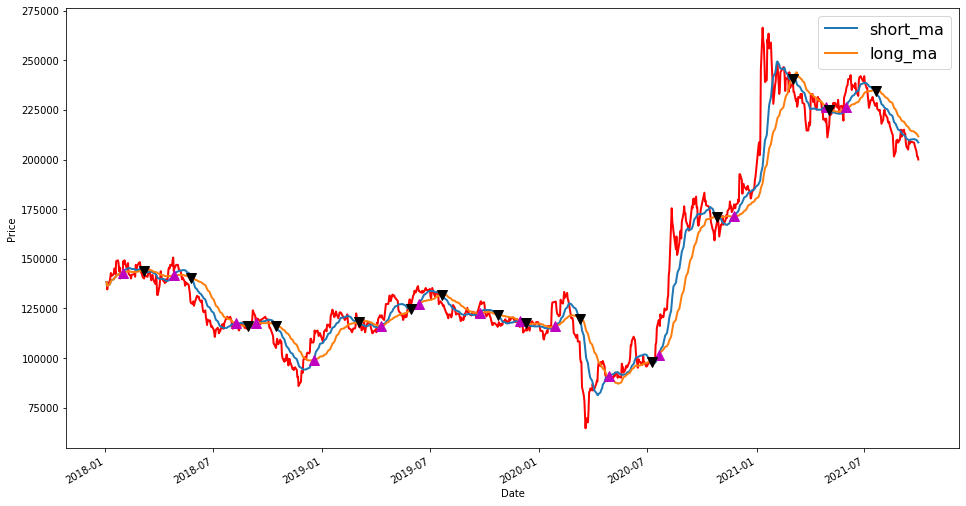

In [ ]:
#현대차
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Price')
stocks.HYUNDAI.plot(ax=ax1, color = 'r', lw=2.)
signals_hyundai[['short_ma','long_ma']].plot(ax=ax1, lw=2.)
#buy signals
ax1.plot(signals_hyundai.loc[signals_hyundai.positions == 1.0].index,
         signals_hyundai.short_ma[signals_hyundai.positions == 1.0],
         '^', markersize=10, color='m')
#sell signals
ax1.plot(signals_hyundai.loc[signals_hyundai.positions == -1.0].index,
         signals_hyundai.short_ma[signals_hyundai.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

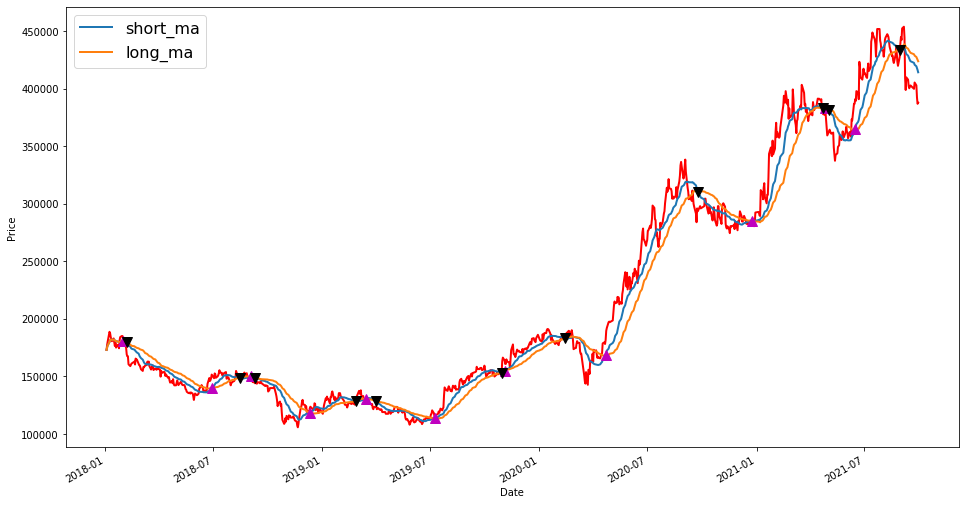

In [ ]:
#NAVER
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Price')
stocks.NAVER.plot(ax=ax1, color = 'r', lw=2.)
signals_naver[['short_ma','long_ma']].plot(ax=ax1, lw=2.)
#buy signals
ax1.plot(signals_naver.loc[signals_naver.positions == 1.0].index,
         signals_naver.short_ma[signals_naver.positions == 1.0],
         '^', markersize=10, color='m')
#sell signals
ax1.plot(signals_naver.loc[signals_naver.positions == -1.0].index,
         signals_naver.short_ma[signals_naver.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

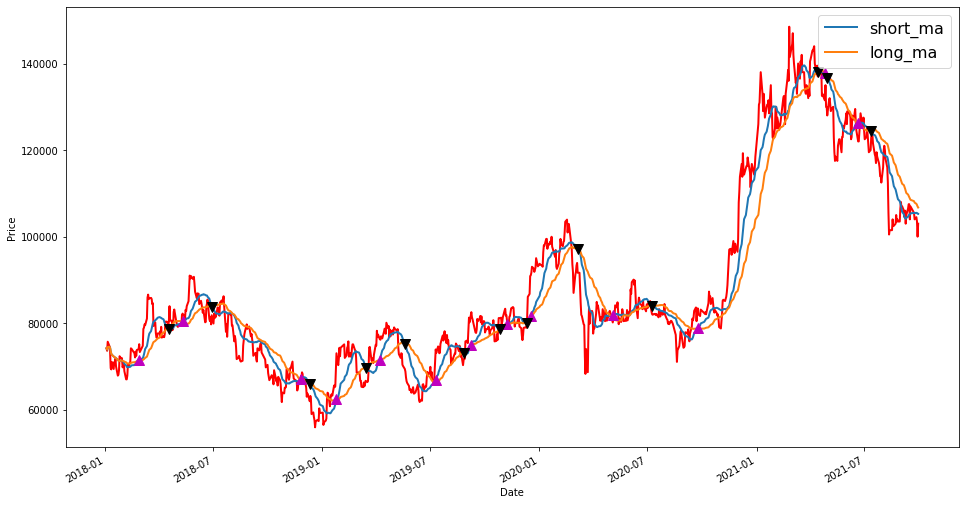

In [ ]:
#SK하이닉스
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Price')
stocks.SK_HYNIX.plot(ax=ax1, color = 'r', lw=2.)
signals_sk[['short_ma','long_ma']].plot(ax=ax1, lw=2.)
#buy signals
ax1.plot(signals_sk.loc[signals_sk.positions == 1.0].index,
         signals_sk.short_ma[signals_sk.positions == 1.0],
         '^', markersize=10, color='m')
#sell signals
ax1.plot(signals_sk.loc[signals_sk.positions == -1.0].index,
         signals_sk.short_ma[signals_sk.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

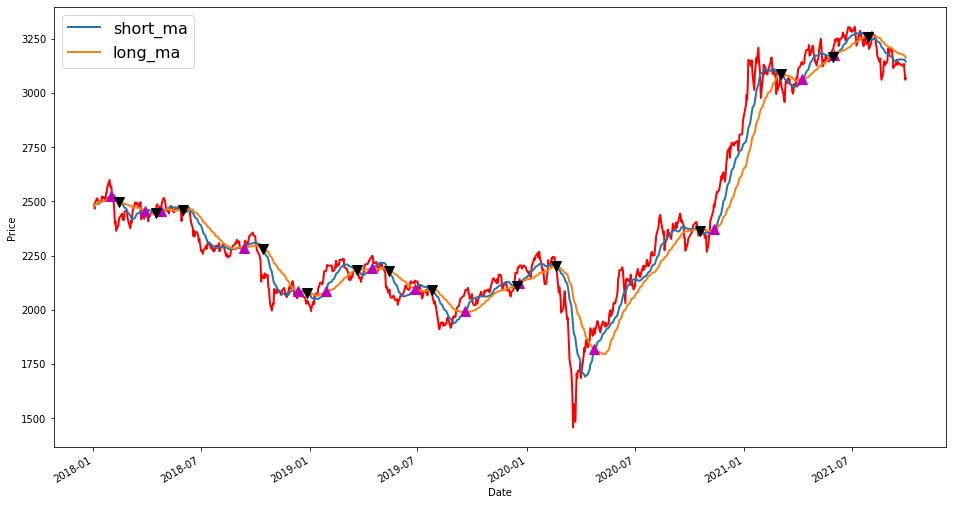

In [ ]:
#KOSPI
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(111, ylabel='Price')
stocks.KOSPI.plot(ax=ax1, color = 'r', lw=2.)
signals_kospi[['short_ma','long_ma']].plot(ax=ax1, lw=2.)
#buy signals
ax1.plot(signals_kospi.loc[signals_kospi.positions == 1.0].index,
         signals_kospi.short_ma[signals_kospi.positions == 1.0],
         '^', markersize=10, color='m')
#sell signals
ax1.plot(signals_kospi.loc[signals_kospi.positions == -1.0].index,
         signals_kospi.short_ma[signals_kospi.positions == -1.0],
         'v', markersize=10, color='k')
plt.show()

************************************
4. 각 자산에 대해서 long-window의 값에 따른 성과(holding period return)를 구하고, 최적이 되는 long-window의 값을 구하시오. 그리고 benchmark 전략(buy-and-hold strategy)의 수익률도 계산하시오.

In [ ]:
#hpr 구하는 함수
def strategy_hpr(company, long_window):
  short_window = 20
  long_window = long_window

  signals = pd.DataFrame(index=stocks.index)
  signals['signal'] = 0.0
  signals['short_ma'] = stocks[company].rolling(window=short_window,min_periods=1, center=False).mean()
  signals['long_ma'] = stocks[company].rolling(window=long_window,min_periods=1, center=False).mean()
  signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] 
                                            > signals['long_ma'][short_window:], 1.0, 0.0)
  signals['positions'] = signals['signal'].diff()

  initial_capital = float(10000000.0)
  
  positions = pd.DataFrame(index=signals.index).fillna(0.0)
  positions[company] = 100*signals['signal']
  portfolio = positions.multiply(stocks[company], axis=0)
  pos_diff = positions.diff()
  portfolio['holdings'] = positions.multiply(stocks[company], axis=0).sum(axis=1)
  portfolio['cash'] = initial_capital - (pos_diff.multiply(stocks[company], axis=0)).sum(axis=1).cumsum()
  portfolio['total'] = portfolio['cash'] + portfolio['holdings']
  portfolio['returns'] = portfolio['total'].pct_change()*100
  portfolio['Close'] = stocks[company]
  portfolio['ret_Close'] = stocks[company].pct_change()*100
  portfolio['ret_position'] = portfolio['ret_Close'].mul(signals['signal'])
  portfolio['signal'] = signals['signal']
  portfolio['positions'] = signals['positions']
  portfolio.fillna(0.0)

  #전략의 hpr
  hpr_strategy = portfolio['ret_position'].sum()
  return hpr_strategy

In [ ]:
#현대차의 전략
hprs_hyundai = []
for i in range(41):
  hpr = strategy_hpr('HYUNDAI', 40+i)
  print("HYUNDAI의 long-window", 40+i, "전략 hpr:", hpr)
  hprs_hyundai.append(hpr)
print("\nHYUNDAI의 최적 long-window:",hprs_hyundai.index(max(hprs_hyundai))+40, "\n최적 수익률:",max(hprs_hyundai))

HYUNDAI의 long-window 40 전략 hpr: 35.62736934787144
HYUNDAI의 long-window 41 전략 hpr: 36.08192222636569
HYUNDAI의 long-window 42 전략 hpr: 27.527720651185195
HYUNDAI의 long-window 43 전략 hpr: 37.02783798621948
HYUNDAI의 long-window 44 전략 hpr: 35.771711404254305
HYUNDAI의 long-window 45 전략 hpr: 39.5375755980598
HYUNDAI의 long-window 46 전략 hpr: 47.94389192781308
HYUNDAI의 long-window 47 전략 hpr: 38.668433733183036
HYUNDAI의 long-window 48 전략 hpr: 31.85249929890989
HYUNDAI의 long-window 49 전략 hpr: 38.569187853383866
HYUNDAI의 long-window 50 전략 hpr: 48.168311472458406
HYUNDAI의 long-window 51 전략 hpr: 45.444286657672336
HYUNDAI의 long-window 52 전략 hpr: 49.66966430486841
HYUNDAI의 long-window 53 전략 hpr: 52.19258524727593
HYUNDAI의 long-window 54 전략 hpr: 44.331228123111984
HYUNDAI의 long-window 55 전략 hpr: 41.96437878047182
HYUNDAI의 long-window 56 전략 hpr: 34.89248010282129
HYUNDAI의 long-window 57 전략 hpr: 32.2180658743471
HYUNDAI의 long-window 58 전략 hpr: 36.95663092825307
HYUNDAI의 long-window 59 전략 hpr: 43.5184801376

In [ ]:
#네이버의 전략
hprs_naver = []
for i in range(41):
  hpr = strategy_hpr('NAVER', 40+i)
  print("NAVER의 long-window", 40+i, "전략 hpr:", hpr)
  hprs_naver.append(hpr)
print("\nNAVER의 최적 long-window:",hprs_naver.index(max(hprs_naver))+40, "\n최적 수익률:",max(hprs_naver))

NAVER의 long-window 40 전략 hpr: 128.48905294979912
NAVER의 long-window 41 전략 hpr: 130.26378363884191
NAVER의 long-window 42 전략 hpr: 142.77558351522154
NAVER의 long-window 43 전략 hpr: 141.96903096696104
NAVER의 long-window 44 전략 hpr: 143.40282854179648
NAVER의 long-window 45 전략 hpr: 136.1946349235768
NAVER의 long-window 46 전략 hpr: 139.28902781539963
NAVER의 long-window 47 전략 hpr: 133.11436763596697
NAVER의 long-window 48 전략 hpr: 134.66673120091414
NAVER의 long-window 49 전략 hpr: 130.48941259468526
NAVER의 long-window 50 전략 hpr: 123.83514697972568
NAVER의 long-window 51 전략 hpr: 122.69336571648695
NAVER의 long-window 52 전략 hpr: 122.56631201645068
NAVER의 long-window 53 전략 hpr: 119.56596575330484
NAVER의 long-window 54 전략 hpr: 117.8725258104058
NAVER의 long-window 55 전략 hpr: 110.40720271631326
NAVER의 long-window 56 전략 hpr: 110.5778511804771
NAVER의 long-window 57 전략 hpr: 108.66789210817149
NAVER의 long-window 58 전략 hpr: 108.10376907335666
NAVER의 long-window 59 전략 hpr: 109.02299618464873
NAVER의 long-window 60 전

In [ ]:
#SK하이닉스의 전략
hprs_sk = []
for i in range(41):
  hpr = strategy_hpr('SK_HYNIX', 40+i)
  print("SK_HYNIX의 long-window", 40+i, "전략 hpr:", hpr)
  hprs_sk.append(hpr)
print("\nSK_HYNIX의 최적 long-window:",hprs_sk.index(max(hprs_sk))+40, "\n최적 수익률:",max(hprs_sk))

SK_HYNIX의 long-window 40 전략 hpr: 40.23075828044675
SK_HYNIX의 long-window 41 전략 hpr: 41.84394555809397
SK_HYNIX의 long-window 42 전략 hpr: 39.11148920223758
SK_HYNIX의 long-window 43 전략 hpr: 38.436660530959415
SK_HYNIX의 long-window 44 전략 hpr: 49.20893836729478
SK_HYNIX의 long-window 45 전략 hpr: 54.028310197523254
SK_HYNIX의 long-window 46 전략 hpr: 61.67336332920539
SK_HYNIX의 long-window 47 전략 hpr: 56.729023573282504
SK_HYNIX의 long-window 48 전략 hpr: 73.6428577346226
SK_HYNIX의 long-window 49 전략 hpr: 82.4623500047467
SK_HYNIX의 long-window 50 전략 hpr: 84.30226658493766
SK_HYNIX의 long-window 51 전략 hpr: 79.89459842073622
SK_HYNIX의 long-window 52 전략 hpr: 74.624536008199
SK_HYNIX의 long-window 53 전략 hpr: 69.49197819819018
SK_HYNIX의 long-window 54 전략 hpr: 67.75950475118876
SK_HYNIX의 long-window 55 전략 hpr: 68.1257900857446
SK_HYNIX의 long-window 56 전략 hpr: 69.33170479501291
SK_HYNIX의 long-window 57 전략 hpr: 76.23255469711606
SK_HYNIX의 long-window 58 전략 hpr: 76.90536674918206
SK_HYNIX의 long-window 59 전략 hpr: 

In [ ]:
#코스피의 전략
hprs_kospi = []
for i in range(41):
  hpr = strategy_hpr('KOSPI', 40+i)
  print("KOSPI의 long-window", 40+i, "전략 hpr:", hpr)
  hprs_kospi.append(hpr)
print("\nKOSPI의 최적 long-window:",hprs_kospi.index(max(hprs_kospi))+40, "\n최적 수익률:",max(hprs_kospi))

KOSPI의 long-window 40 전략 hpr: 29.131202121507656
KOSPI의 long-window 41 전략 hpr: 28.71123621634152
KOSPI의 long-window 42 전략 hpr: 28.288548591594527
KOSPI의 long-window 43 전략 hpr: 26.554997599508702
KOSPI의 long-window 44 전략 hpr: 25.38100610106261
KOSPI의 long-window 45 전략 hpr: 26.691898263735027
KOSPI의 long-window 46 전략 hpr: 21.488659683065475
KOSPI의 long-window 47 전략 hpr: 22.132387729810915
KOSPI의 long-window 48 전략 hpr: 22.648284931422232
KOSPI의 long-window 49 전략 hpr: 19.245357311384335
KOSPI의 long-window 50 전략 hpr: 21.711162659812935
KOSPI의 long-window 51 전략 hpr: 25.230365693021326
KOSPI의 long-window 52 전략 hpr: 23.676549443966202
KOSPI의 long-window 53 전략 hpr: 17.94686073789841
KOSPI의 long-window 54 전략 hpr: 21.131370092177185
KOSPI의 long-window 55 전략 hpr: 21.96375345020934
KOSPI의 long-window 56 전략 hpr: 22.603282574301044
KOSPI의 long-window 57 전략 hpr: 23.871743737020957
KOSPI의 long-window 58 전략 hpr: 23.33428243998031
KOSPI의 long-window 59 전략 hpr: 26.638373632415117
KOSPI의 long-window 60 전략 

In [ ]:
#최적 전략
print("HYUNDAI의 최적 long-window:",hprs_hyundai.index(max(hprs_hyundai))+40, "\n최적 수익률:",max(hprs_hyundai))
print("NAVER의 최적 long-window:",hprs_naver.index(max(hprs_naver))+40, "\n최적 수익률:",max(hprs_naver))
print("SK_HYNIX의 최적 long-window:",hprs_sk.index(max(hprs_sk))+40, "\n최적 수익률:",max(hprs_sk))
print("KOSPI의 최적 long-window:",hprs_kospi.index(max(hprs_kospi))+40, "\n최적 수익률:",max(hprs_kospi))

#buy-and-hold 전략(벤치마크)의 hpr
hpr_bnh_hyundai = 100*np.log(stocks.HYUNDAI[-1]/stocks.HYUNDAI[0])
print("HYUNDAI의 buy and hold 전략의 hpr:", hpr_bnh_hyundai)

hpr_bnh_naver = 100*np.log(stocks.NAVER[-1]/stocks.NAVER[0])
print("NAVER의 buy and hold 전략의 hpr:", hpr_bnh_naver)

hpr_bnh_sk = 100*np.log(stocks.SK_HYNIX[-1]/stocks.SK_HYNIX[0])
print("SK_HYNIX의 buy and hold 전략의 hpr:", hpr_bnh_sk)

hpr_bnh_kospi = 100*np.log(stocks.KOSPI[-1]/stocks.KOSPI[0])
print("KOSPI의 buy and hold 전략의 hpr:", hpr_bnh_kospi)

HYUNDAI의 최적 long-window: 53 
최적 수익률: 52.19258524727593
NAVER의 최적 long-window: 44 
최적 수익률: 143.40282854179648
SK_HYNIX의 최적 long-window: 50 
최적 수익률: 84.30226658493766
KOSPI의 최적 long-window: 79 
최적 수익률: 34.03151161450401
HYUNDAI의 buy and hold 전략의 hpr: 36.95488646313798
NAVER의 buy and hold 전략의 hpr: 80.69604162322086
SK_HYNIX의 buy and hold 전략의 hpr: 32.79350414988752
KOSPI의 buy and hold 전략의 hpr: 21.047733429578987


****************************
5. 4개의 자산에 대해서 전략들의 성과를 비교 설명하시오. 자산들간의 성과가 차이나는 이유는 무엇인가?

각 자산들의 전략의 수익률은 34%에서 143%까지 매우 다양하게 분포한다. 우선 각 전략의 수익률이 차이가 나는 가장 큰 이유는 buy&hold 전략을 취한 벤치마크의 수익률이 좋을수록 전략의 수익률이 좋았다.

다음으로 최적 long-window가 다르게 나왔기 때문인데, long-window가 각각 44일에서 79일까지 다르게 나온 이유는 자산 가격의 randomness한 특성 때문에 각 기초자산별로 가격 움직임의 모멘텀, 그리고 이동평균의 추이가 다르게 나타나서 각 자산에 맞는 최적 long-window가 크게 차이가 나기 때문이다.

***************************************
6. 위 코딩의 결과를 바탕으로, 효율적 시장가설과 active 투자전략과 passive 투자전략에 대해서 논하라.

효율적 시장가설(EMH)은 한 문장으로 '그 누구도 지속적으로 시장 평균 수익률을 이길 수 없다'라고 요약할 수 있다. EMH의 개념은 재무관리, 투자론, 파생상품론 등의 재무학 수업시간에서 귀에 못이 박히도록 들어왔었는데, 수업시간에 주식투자에 관하여 교수님들께서 학생들에게 조언하실 때, EMH를 논거로 삼으시며 '지수추종을 하는게 최고다'라고 하시면서 active 투자보단 passive투자의 힘을 설파하셨다.

이러한 영향을 받았기 때문에 나 또한 수업에서 배운 것 처럼 실제 시장 또한 'strong form EMH는 지지되지 않지만 weak form, semi-strong form EMH는 실증적으로 지지된다'고 생각하여 수 년간 개인적으로 투자를 하면서 단기적인 trading 이외에는 active하게 각종 분석을 통해 개별 증권에 투자하기 보다는 주로 passive하게 주식, 원자재 등의 index에 투자를 해 왔었다.

그런데 오늘 코딩을 통해 장.단기 MA를 이용한 간단한 알고리즘 트레이딩 전략을 구현해 보면서 그동안 맹목적으로 지지해 왔던 EMH에 대하여 조금은 유도리 있는 시각을 가져야 한다고 느끼게 되었다.

코딩의 결과 MA의 조건을 다양하게 설정하였음에도, 이러한 조건들의 수익률을 평균내어 보면 벤치마크의 수익률보다 월등하여 시장을 아주 간단하게 이길 수 있었으며, 이는 이렇게 단순한 전략을 이용했음에도 데이터셋의 출처인 지난 3년간 한국 주식시장에서는 semi-strong form도 아닌 주가정보를 이용하는 weak-form EMH조차 성립하지 않았다는 것을 보여주었기 때문이다.

물론 이러한 결과는 지난 몇 년과 같이 시장이 상승장이 아니라 횡보장이거나, 다른 나라의 주식시장에서는 실패할 수도 있고, 아니면 데이터셋에 작위적으로 전략을 맞춘 과최적화의 결과로 의심의 여지가 충분히 있다고 생각한다. 하지만, 오늘의 코딩의 결과를 보면서 금융공학을 전공하고, 금융권에서 일하기를 꿈꾸는 학생 으로써 단순히 시장을 관조적으로 바라보는 passive한 투자만을 하기 보단, 적극적으로 시장의 알파를 찾기 위해 passive와 active를 상호 보완적으로 다양화 하여 투자할 필요가 있다고 느끼게 되었다.